# Step 1 : Define the objective of the problem statement

In [46]:
# create the model which can predict the  occurrence of diabetes 
# based on the given input
# provided i.e pregnancies,glucose,Blood Pressure,skin Thickness,
#Insulin,BMI,Age,Diabetes

In [47]:
# x = pregnancies,glucose,Blood Pressure,skin Thikness,
#      Insuliin,BMI,Age,Diabetes
# y = output(1,0)
# 1 => Diabetes Occur
# 0 => Diabetes Not Occur

# Step 2 : Data Gathering

In [48]:
# kaggle.com
# We are using the Diabetes Dataset from Kaggle for this study.

# Step 3 : Data Preparation

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                  # The Sklearn toolkit is incredibly practical and helpful 
import warnings 
warnings.filterwarnings("ignore")    #  and has practical applications. It offers a vast selection of ML models and algorithms
# We will use Python because it is the most adaptable and powerful programming language for data analysis purposes

In [50]:
df = pd.read_csv("diabetes.csv")

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [54]:
df.describe()
# The next step is cleaning the dataset, which is a crucial step in data analysis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
# observation : skin thickness,insulin, blood pressure,and glucose 
#    each have some 0 values  A particular column's mean or median 
#     scores must be used to replace unwanted 0 values.

In [56]:
# Replacing 0 value with the mean of that column

# Replacing 0 value of Glucose
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())

# Filling ) values of Blood Pressure
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())

# Replacing 0 value in BMI
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

#  Replacing the missing value of insulin and skinThickness
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

In [57]:
df.head()
# The target variable is the labels with values of 1 and 0. A person's diabetes status is indicated by a one or a zero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


# Step 4 : Exploratory Data Analysis

In [58]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
df.shape

(768, 9)

In [60]:
df.size

6912

In [61]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Correlation heatmap')

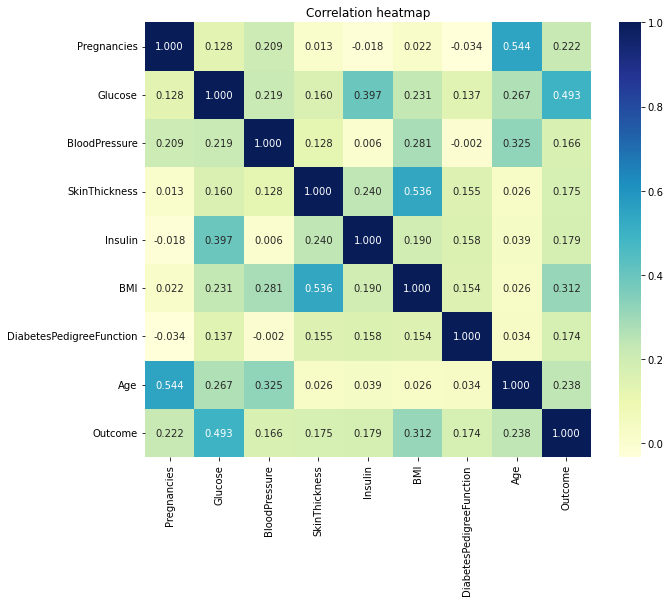

In [62]:
# Correlation plot of the independent variable

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True,fmt =".3f",cmap = "YlGnBu")
plt.title("Correlation heatmap")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

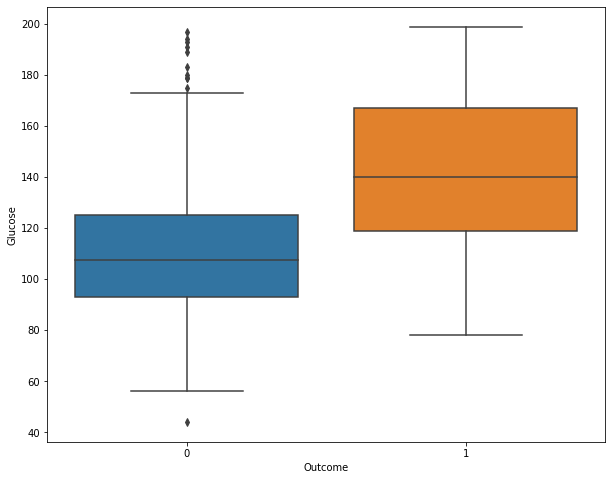

In [63]:
# Exploring the Glucose and The Target variable together
plt.figure(figsize = (10,8))
sns.boxplot(data = df,x = "Outcome",y = "Glucose")

In [66]:
# Observation :- The likelihood of developing diabetes gradually 
#                climbs with glucose levels

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

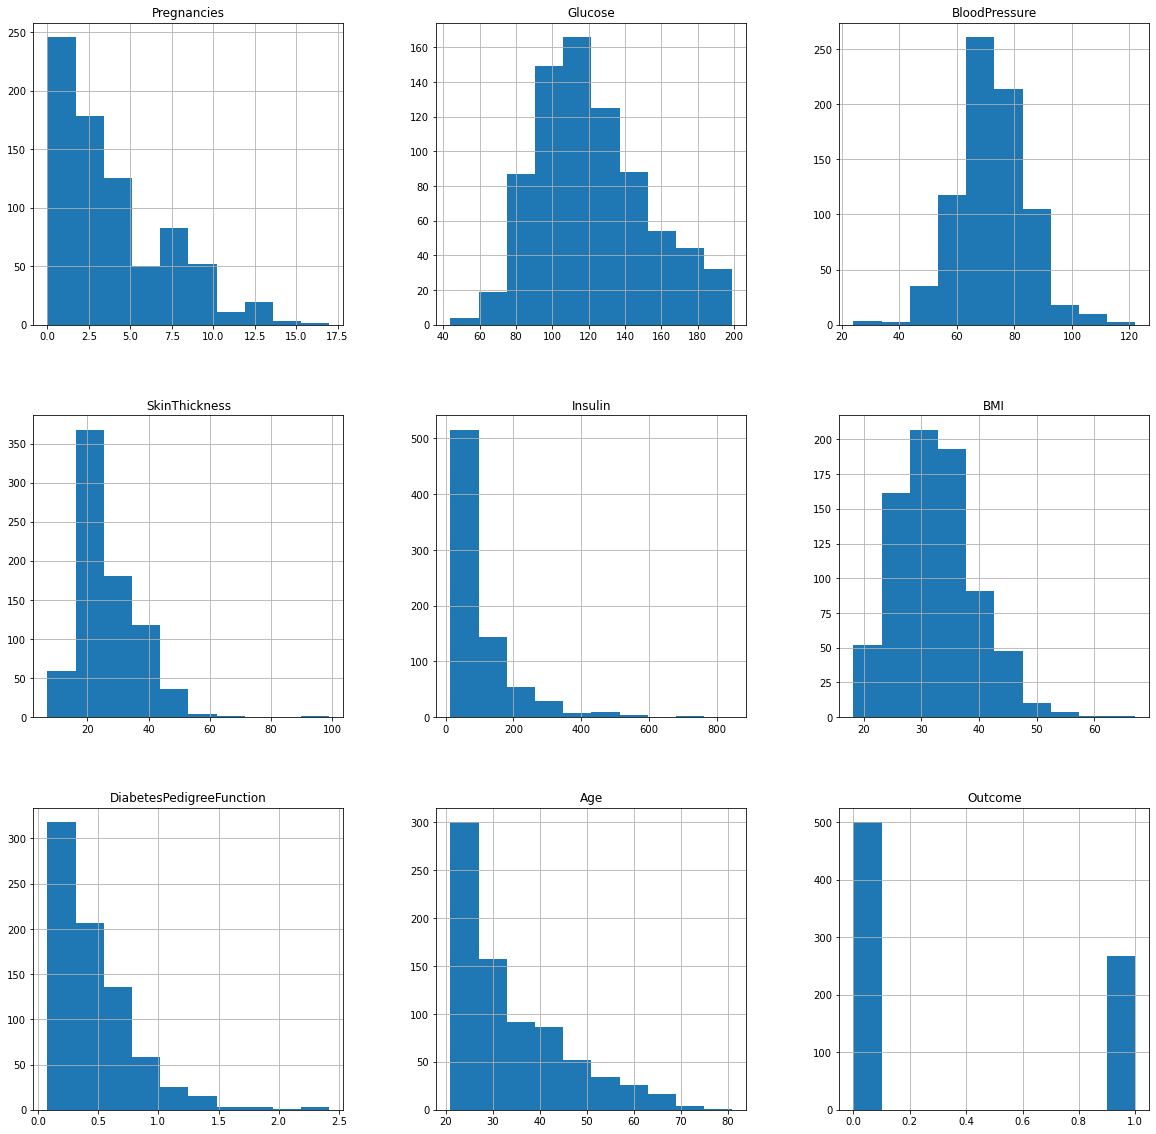

In [67]:
df.hist(figsize=(20,20))


# Step 5 : Building a MAchine Learning Model

In [68]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify= y)
# The above code splits the dataset into the train (70%) and test (30%) datasets

In [70]:
print("X_train.shape = ",X_train.shape)
print("X_test.shape = ",X_test.shape)
print("y2_train.shape = ",y_train.shape)
print("y2_test.shape = ",y_test.shape)

X_train.shape =  (537, 8)
X_test.shape =  (231, 8)
y2_train.shape =  (537,)
y2_test.shape =  (231,)


 ## Model Creation

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print(" Model Created:-",model)

 Model Created:- LogisticRegression()


# Step 6 : Model Evaluation & Organization
#### We will test many machine learning models and compare their accuracy in this part.

In [72]:
# Model Training
model.fit(X_train,y_train)
print("Model Train Successfully !")

Model Train Successfully !


# Step 7 : Model Prediction

In [73]:
y_pred = model.predict(X_test)

In [74]:
# Creation Model Accuracy

from sklearn import metrics
acc = metrics.accuracy_score(y_pred,y_test)
print("Accuracy:- ",round(acc*100,2))

Accuracy:-  72.73


In [75]:
### Model of KNN

# Model Creation
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors =  5)
print("Model Created  :- ",model)

# Model Trainig
model.fit(X_test,y_test)
print("Model Train  Successfully ! ")

# Model Prediction
y_pred = model.predict(X_test)
print("Model Predict Successfully ! ")

# Model Accuracy
from sklearn import metrics
acc  = metrics.accuracy_score(y_pred,y_test)
print("Accuracy :- ",round(acc*100,2))

Model Created  :-  KNeighborsClassifier()
Model Train  Successfully ! 
Model Predict Successfully ! 
Accuracy :-  78.35


In [76]:
acc_list = []
for k in range(1,30,2):
    # model creation
    model = KNeighborsClassifier(n_neighbors = k)
    
    # model Training
    model.fit(X_test,y_test)
    
    # model Prediction
    y_pred = model.predict(X_test)
    
    # model accuracy
    acc = metrics.accuracy_score(y_pred,y_test)
    print(acc)
    acc_list.append(acc)

1.0
0.8138528138528138
0.7835497835497836
0.7705627705627706
0.7792207792207793
0.7922077922077922
0.7575757575757576
0.7532467532467533
0.7619047619047619
0.7619047619047619
0.7445887445887446
0.7359307359307359
0.7229437229437229
0.7229437229437229
0.7229437229437229


Text(0, 0.5, 'Accuracy')

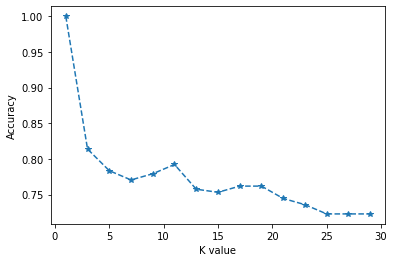

In [77]:
# plot the graph between k and accuracy

k = list(range(1,30,2))
plt.plot(k,acc_list,'--*')
plt.xlabel("K value")
plt.ylabel("Accuracy")

In [78]:
# Support Vector Machine (SVM)

# Model Creation
from sklearn.svm import SVC
model = SVC( C = 1,kernel = 'linear')
print("Model :-",model)

# Model Training
model.fit(X_train,y_train)
print("Model Train successfully !")

# Model Predict
y_pred = model.predict(X_test)
print("Model Predict Successfully !")

# Model Accuracy
acc = metrics.accuracy_score(y_pred,y_test)
print("Accuracy :- ",round(acc*100,2))

Model :- SVC(C=1, kernel='linear')
Model Train successfully !
Model Predict Successfully !
Accuracy :-  73.59


In [79]:
# naive Bayes

# Model Creation
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
print("Model :-",model)

# Model Training
model.fit(X_test,y_test)
print("Model Training Successfully !")

# Model Predict
y_pred = model.predict(X_test)
print("Model Predict Successfully !")

# Model Accuracy
from sklearn import metrics
acc = model.score(X_test,y_test)
print("Accuracy :- ",round(acc*100,2))

Model :- GaussianNB()
Model Training Successfully !
Model Predict Successfully !
Accuracy :-  72.29


In [80]:
# prediction

P = 2 
G = 148
BP = 48
ST = 76
I =  180  
B = 32
D = 0.3
A = 47
pred = model.predict([[P,G,BP,ST,I,B,D,A]])[0]
if pred == 1:
    print("Diabetes Occurs")
else:
    print("Diabetes Not Occur")

Diabetes Occurs
